In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [37]:
def kl_div(A, B):
    n = A.shape[0]
    return 0.5 * (np.trace(np.linalg.solve(B, A)) - n + np.linalg.slogdet(B)[1] - np.linalg.slogdet(A)[1])

def reverse_maximin(points):
    n = np.shape(points)[0]
    indices = np.zeros(n, dtype=int)
    lengths = np.zeros(n, dtype=float)
    dists = np.linalg.norm(points - points[0], axis=1)
    indices[-1] = 0
    lengths[0] = np.inf
    for i in range(n - 2, -1, -1):
        k = np.argmax(dists)
        indices[i] = k
        lengths[i] = dists[k]
        dists = np.minimum(dists, np.linalg.norm(points[k] - points, axis=1))
    return indices, lengths

def maximin(points):
    order = reverse_maximin(points)[0]
    return order[::-1]

In [18]:
with open('10x10iso1024.pickle', 'rb') as f:
    data = pickle.load(f)

In [38]:
nx = 10
nz = 10
x_points = np.linspace(0.0, 0.9, nx, dtype = np.float64)
y_points = 0.9
z_points = np.linspace(0.0, 0.9, nz, dtype = np.float64)
points = np.array([axis.ravel() for axis in np.meshgrid(x_points, y_points, z_points, indexing = 'ij')], dtype = np.float64).T
order = maximin(points)
ordered_points = points[order]

In [39]:
#reorder middle axis using the maximin ordering
data = data[:, order, :]

In [65]:
z_velocity = data[:, :, -1]
z_covariance  = np.cov(z_velocity, rowvar=False, bias=True)

In [66]:
print(z_covariance)

[[0.56441333 0.18354186 0.28951893 ... 0.22714699 0.20960362 0.20002125]
 [0.18354186 0.1433248  0.08120138 ... 0.11250257 0.11754667 0.11225264]
 [0.28951893 0.08120138 0.28713642 ... 0.16369822 0.13749062 0.10721721]
 ...
 [0.22714699 0.11250257 0.16369822 ... 0.3510216  0.27435083 0.16716738]
 [0.20960362 0.11754667 0.13749062 ... 0.27435083 0.28877464 0.16483582]
 [0.20002125 0.11225264 0.10721721 ... 0.16716738 0.16483582 0.18400536]]


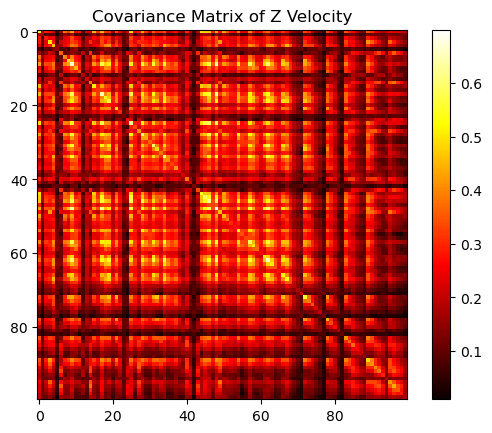

In [67]:
#plot covariance matrix
plt.imshow(z_covariance, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Covariance Matrix of Z Velocity')
plt.show()

In [68]:
def plot_column_scatterplot(A, col):
    for i in range(A.shape[1]):
        if A[i, col] != 0:
            plt.scatter(i, A[i, col], color='black')
    plt.show()

def plot_3d(points, theta, col):
    ax = plt.figure().add_subplot(projection='3d')
    mag = np.log10(np.abs(theta[:, col]))
    ax.scatter(points[:, 0], points[:, 2], mag)
    plt.show()

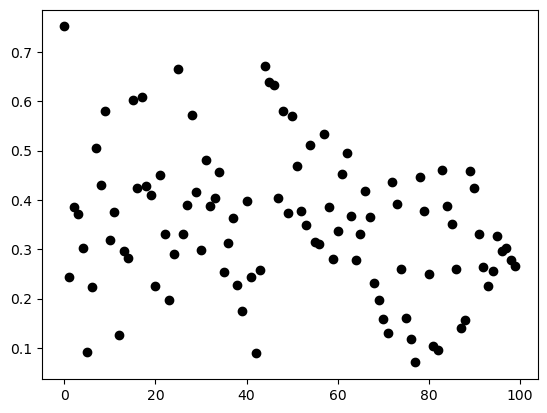

In [70]:
plot_column_scatterplot(np.linalg.cholesky(z_covariance), 0)

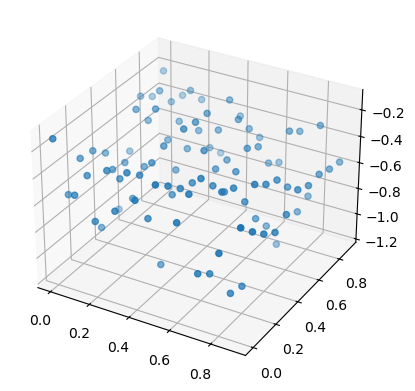

In [71]:
plot_3d(points, np.linalg.cholesky(z_covariance), 0)

In [74]:
# sample every other timestep
half_data = data[::2, :, :]
half_z_velocity = half_data[:, :, -1]
half_z_covariance = np.cov(half_z_velocity, rowvar=False, bias=True)
# sample every 3rd timestep
third_data = data[::3, :, :]
third_z_velocity = third_data[:, :, -1]
third_z_covariance = np.cov(third_z_velocity, rowvar=False, bias=True)
# sample every 4th timestep
quarter_data = data[::4, :, :]
quarter_z_velocity = quarter_data[:, :, -1]
quarter_z_covariance = np.cov(quarter_z_velocity, rowvar=False, bias=True)

kl = kl_div(z_covariance, half_z_covariance)
print(kl)
kl = kl_div(z_covariance, third_z_covariance)
print(kl)
kl = kl_div(z_covariance, quarter_z_covariance)
print(kl)


0.00010116830554807166
0.00040859671568682643
0.0010334601181227754
